# Visualizing Earnings Based on College Majors

# Introduction

In this project, we'll work on a dataset with data on the job outcomes of students who graduated from college between 2010 and 2012. The original dataset was originally posted by the [American Community Survey](https://www.census.gov/programs-surveys/acs/) but we will be using the cleaned dataset by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

In this dataset, each column has information about a respective college major. Some of the columns in the dataset are as follows: 

* *Rank* - Rank by median earnings (the dataset is ordered by this column)
* *Major_code* - Major code
* *Major* - Major description
* *Major_category* - Category of major
* *Total* - Total number of people with major
* *Sample_size* - Sample size (unweighted) of full-time
* *Men* - Male graduates
* *Women* - Female graduates
* *ShareWomen* - Women as share of total
* *Employed* - Number employed
* *Median* - Median salary of full-time, year-round workers
* *Low_wage_jobs* - Number in low-wage service jobs
* *Full_time* - Number employed 35 hours or more
* *Part_time* - Number employed less than 35 hours

By using data visualization techniques, we will aim to answer the following questions:

* Do students in more popular majors make more money?
* How many majors are predominantly male? Predominantly female?

## Preparing Our Data

First, let's familiarize ourselves with the data.

In [2]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Read data set and assign to DataFrame
recent_grads = pd.read_csv('recent-grads.csv')

# Return first fow, formated as a table
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [3]:
# Print first and last 5 rows
print(recent_grads.head(3))
print(recent_grads.tail(3))

   Rank  Major_code                           Major   Total     Men  Women  \
0     1        2419           PETROLEUM ENGINEERING  2339.0  2057.0  282.0   
1     2        2416  MINING AND MINERAL ENGINEERING   756.0   679.0   77.0   
2     3        2415       METALLURGICAL ENGINEERING   856.0   725.0  131.0   

  Major_category  ShareWomen  Sample_size  Employed  ...  Part_time  \
0    Engineering    0.120564           36      1976  ...        270   
1    Engineering    0.101852            7       640  ...        170   
2    Engineering    0.153037            3       648  ...        133   

   Full_time_year_round  Unemployed  Unemployment_rate  Median  P25th   P75th  \
0                  1207          37           0.018381  110000  95000  125000   
1                   388          85           0.117241   75000  55000   90000   
2                   340          16           0.024096   73000  50000  105000   

   College_jobs  Non_college_jobs  Low_wage_jobs  
0          1534           

In [4]:
# Generate summary statistics
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


If we look at the summary statistics, we notice that *Total*, *Men* and *Women* column are missing one value each. Let's now clean our data by dropping rows with missing values.

In [5]:
# Find number of rows
raw_data_count = recent_grads.shape[0]

# Drop rows with null/missing values
recent_grads = recent_grads.dropna(axis = 0)

# Find number of rows after cleaning
cleaned_data_count = recent_grads.shape[0]

print(raw_data_count)
print(cleaned_data_count)

173
172


As only one row was dropped, this doesn't have a huge effect on our analysis so we will work with this new dataset. In this case, only one college major will not be included.

## Exploring Scatter Plots

**Do students in more popular majors make more money?**


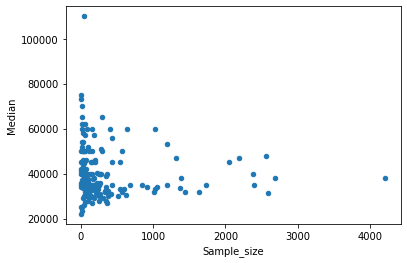

In [6]:
recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter')

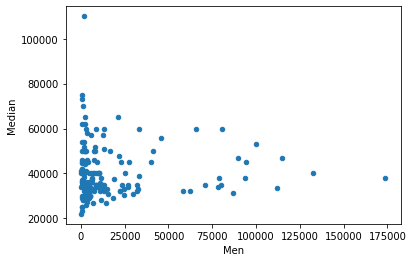

In [8]:
recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter')

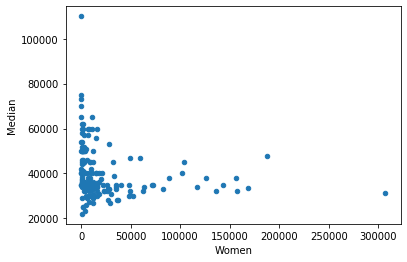

In [9]:
recent_grads.plot(x = 'Women', y = 'Median', kind = 'scatter')

We can see from the graphs above that more popular majors (majors with a higher number of graduates) does not equate to a higher median salary. In fact, the graduates with the highest median salary is from a less popular major.

In [23]:
recent_grads[recent_grads["Median"]>70000]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


If we look at graduates that have the top 3 median salaries, the total number of graduates are within the range of 756-2057 and the sample sizes are also pretty small.

**Is unemployment rate lower or higher in more popular majors?**

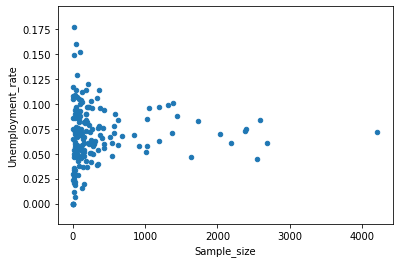

In [85]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter')

If we look at the most popular major, the only data point with a sample size greater than 4000, has an unemployment rate of approximately 7.5%. Comparatively to other data points, more popular majors have a mid-range unemployment rate. 

**Is there any link between the number of full-time employees and median salary?**

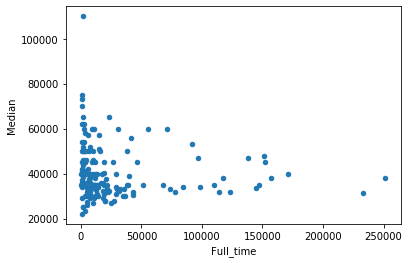

In [86]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter')

It seems like college majors that have a higher number of full-time employees has median salaries that are on the lower end whereas majors with a lower number of full-time employees received higher median salaries. 

**Do students that majored in subjects that were majority female make more money?**

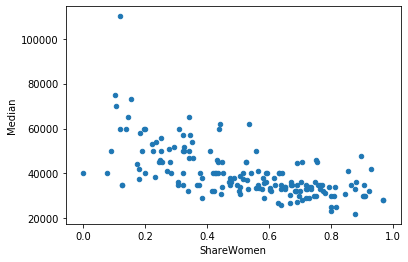

In [24]:
recent_grads.plot(x = 'ShareWomen', y = 'Median', kind = 'scatter')

From the graph above, majors with a higher majority of female graduates have a lower median salary.

## Exploring Histograms

**Histogram of Sample Size**

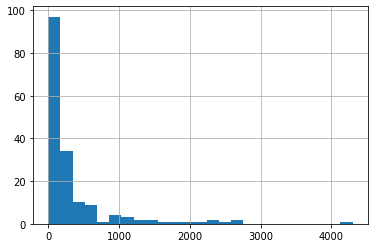

In [30]:
recent_grads['Sample_size'].hist(bins=25, range=(0,4300))

This graph shows us that a large majority of the majors have small sample sizes (less popular).

**Histogram of Median Salaries**

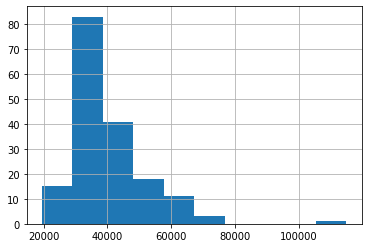

In [91]:
recent_grads['Median'].hist(bins=10, range=(19500,115000))

The most common median salary range is from 30000 to 40000.

**Histogram of Women As A Share of Total**

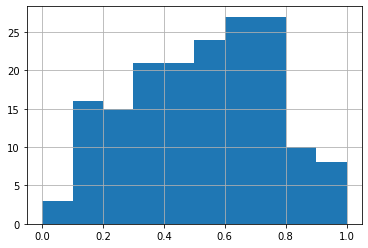

In [102]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1))

We will consider:
* majors with at least 60% females as majors that are predominantly female 
* majors with less then or equal to 40% females as majors that are predominantly male

From the graph above, it seems like there are slightly more majors that are predominantly females.

In [49]:
recent_grads[recent_grads["ShareWomen"]<=0.4]["Major"].count()/172

0.31976744186046513

In [51]:
recent_grads[recent_grads["ShareWomen"]>=0.6]["Major"].count()/172

0.4186046511627907

From our calculations, approximately 42% of the majors are predominantly female and 32% of majors are predominantly males.

## Exploring Bar Plots

**Comparing the Percentages of Women from the First 10 Rows and Last 10 Rows**

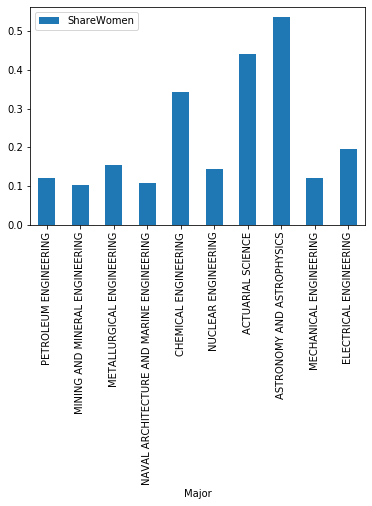

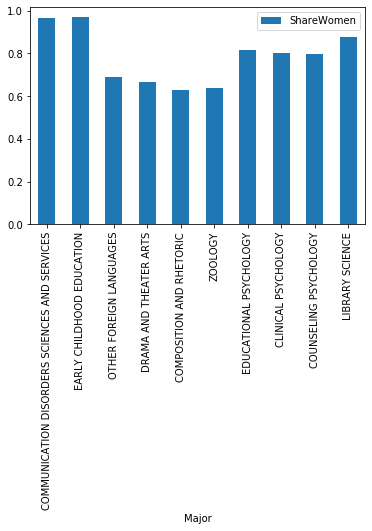

In [119]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

When comparing the first 10 majors and last 10 majors, we notice that there is a higher percentage of women in the last 10 majors in the dataset. The first 10 majors generally have less than 50% of women. These majors are engineering degrees. However, if we look at the last 10 majors, they all have at least 60% of women. These majors range from education, arts to sciences.

## Summary

In conclusion, data visualization techniques are useful for us to understand our data better. We conclude that:

* Students in more popular majors do not make more money.
* Approximately 42% of the majors are predominantly female and 32% of majors are predominantly males.